In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('../data/fifa_players.csv')

In [15]:
df_player = df[['Name', 'Club', 'Overall', 'Potential']]
display(df_player)

,Name,Club,Overall,Potential
0,L. Goretzka,FC Bayern München,87,88
1,Bruno Fernandes,Manchester United,86,87
2,M. Acuña,Sevilla FC,85,85
3,K. De Bruyne,Manchester City,91,91
4,N. Barella,Inter,86,89
...,...,...,...,...
17655,Deng Xiongtao,Meizhou Hakka,48,61
17656,22 Lim Jun Sub,Jeju United FC,48,64
17657,A. Demir,Ümraniyespor,51,56
17658,21 S. Czajor,Fleetwood Town,50,65


In [16]:
# Verificar valores nulos
print(df.isnull().sum())

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64


In [17]:
# Verificar tipos de dados
print(df.dtypes)

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
Kit Number                  

In [19]:
display(df[['Name', 'Overall', 'Age']].describe())

,Overall,Age
count,17660.000000,17660.000000
mean,63.369592,23.127746
std,8.036268,4.639821
min,43.000000,15.000000
25%,58.000000,20.000000
50%,63.000000,22.000000
75%,69.000000,26.000000
max,91.000000,54.000000


In [21]:
display(df[['Name', 'Age']].sort_values(by='Age', ascending=False))

,Name,Age
15272,22 K. Miura,54
15375,G. Buffon,44
17257,17 D. Andersson,43
16036,S. Torrico,42
16311,21 L. Fernández,42
...,...,...
17360,21 H. Broun,16
15536,22 M. Pavel,16
11398,21 W. Essanoussi,16
15030,T. Walczak,16


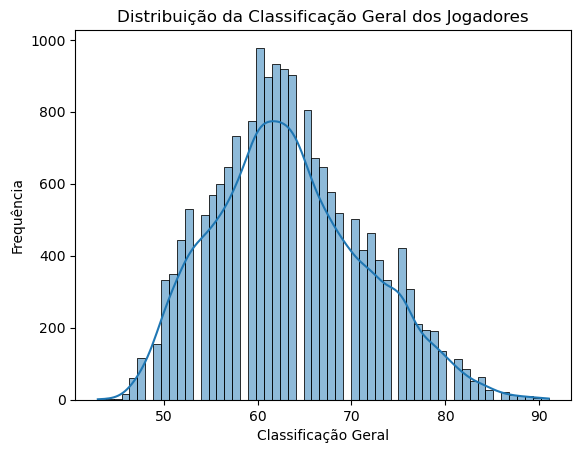

In [23]:
# Gráfico de Distribuição
sns.histplot(df['Overall'], kde=True)
plt.title('Distribuição da Classificação Geral dos Jogadores')
plt.xlabel('Classificação Geral')
plt.ylabel('Frequência')
plt.show()

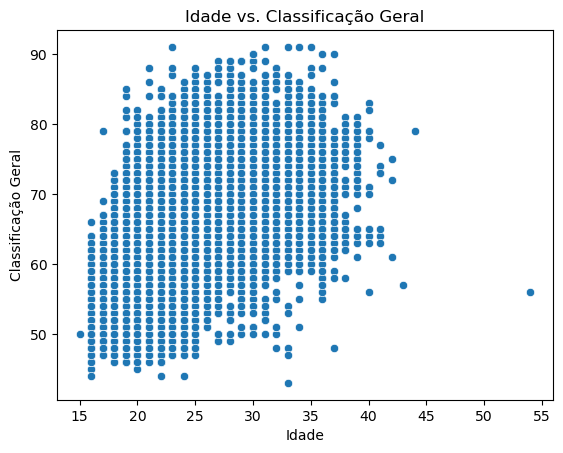

In [27]:
# Gráfico de Dispersão
sns.scatterplot(data=df, x='Age', y='Overall')
plt.title('Idade vs. Classificação Geral')
plt.xlabel('Idade')
plt.ylabel('Classificação Geral')
plt.show()

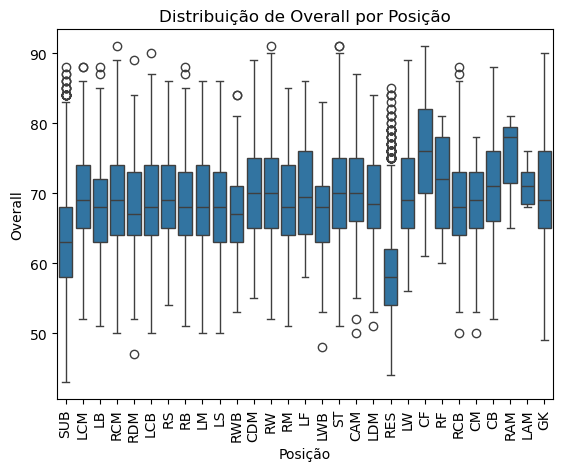

In [48]:
# Gráfico de Boxplot
sns.boxplot(x='Position', y='Overall', data=df)
plt.title('Distribuição de Overall por Posição')
plt.xlabel('Posição')
plt.xticks(rotation=90)
plt.ylabel('Overall')
plt.show()


In [31]:
display(df['Position'])

0        <span class="pos pos28">SUB
1        <span class="pos pos15">LCM
2          <span class="pos pos7">LB
3        <span class="pos pos13">RCM
4        <span class="pos pos13">RCM
                    ...             
17655    <span class="pos pos29">RES
17656    <span class="pos pos29">RES
17657    <span class="pos pos29">RES
17658    <span class="pos pos29">RES
17659    <span class="pos pos29">RES
Name: Position, Length: 17660, dtype: object

In [25]:
import re

# Remover todas as tags <span> da coluna 'Position'
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Exibir o resultado
display(df['Position'])


0        SUB
1        LCM
2         LB
3        RCM
4        RCM
        ... 
17655    RES
17656    RES
17657    RES
17658    RES
17659    RES
Name: Position, Length: 17660, dtype: object

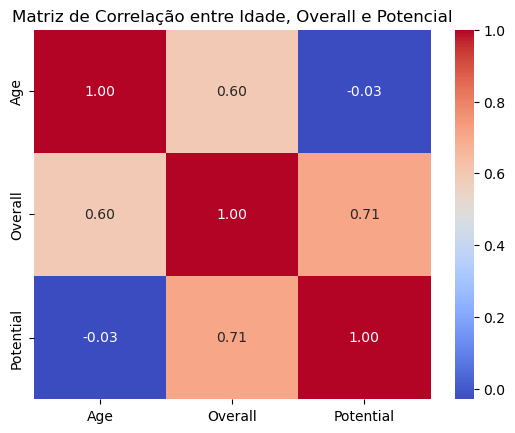

In [36]:
# Calcular correlação entre variáveis numéricas
corr = df[['Age', 'Overall', 'Potential']].corr()

# Visualizar a matriz de correlação com um heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Idade, Overall e Potencial')
plt.show()


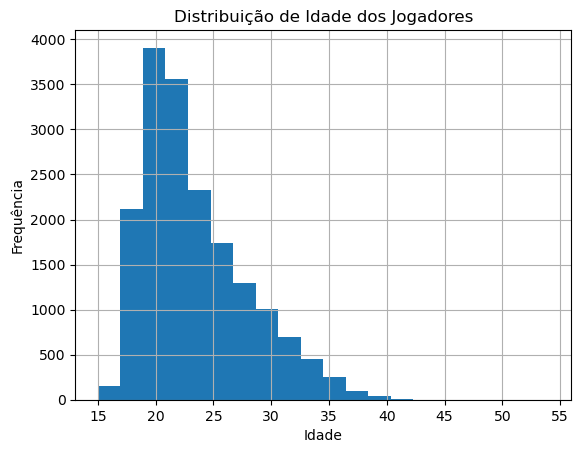

In [38]:
df['Age'].hist(bins=20)
plt.title('Distribuição de Idade dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


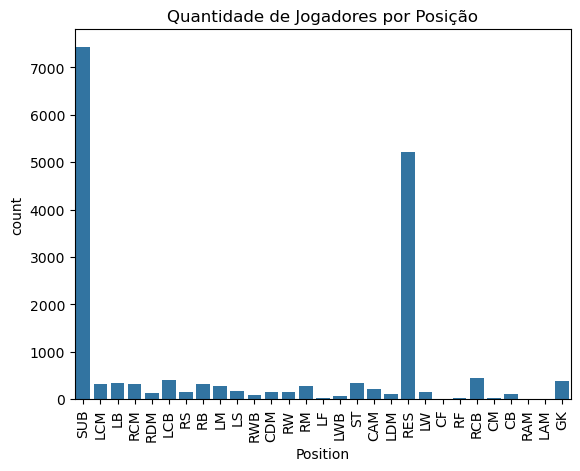

In [42]:
sns.countplot(data=df, x='Position')
plt.title('Quantidade de Jogadores por Posição')
plt.xticks(rotation=90)
plt.show()

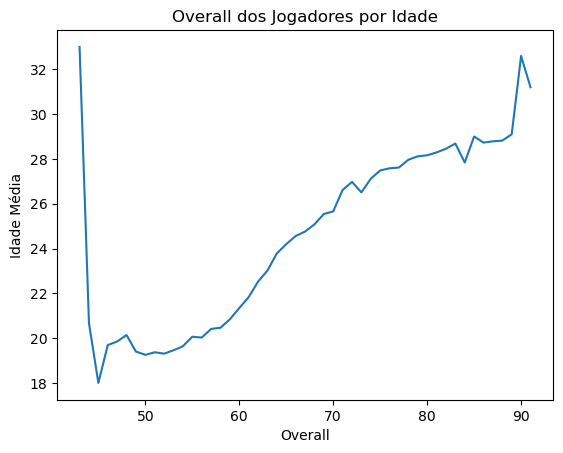

In [61]:
df.groupby('Overall')['Age'].mean().plot()
plt.title('Overall dos Jogadores por Idade')
plt.xlabel('Overall')
plt.ylabel('Idade Média')
plt.show()


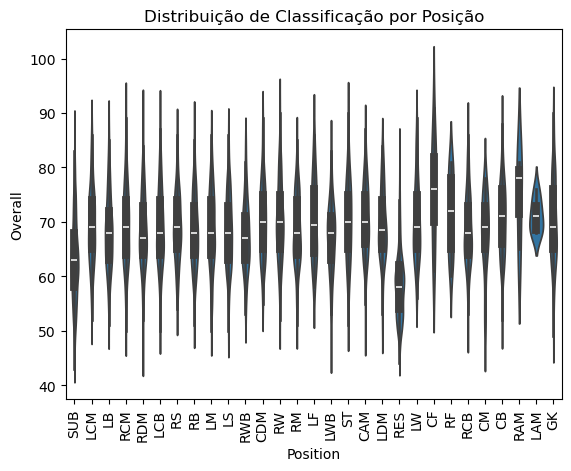

In [62]:
sns.violinplot(data=df, x='Position', y='Overall')
plt.title('Distribuição de Classificação por Posição')
plt.xticks(rotation=90)
plt.show()


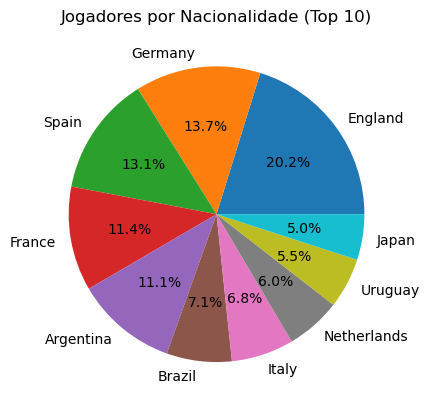

In [65]:
df['Nationality'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title('Jogadores por Nacionalidade (Top 10)')
plt.ylabel('')
plt.show()

In [70]:
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,SUB,"Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,LCM,"Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN


In [83]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Kit Number                  0
dtype: int64

In [26]:
# Remover colunas desnecessárias
df.drop(['Loaned From', 'Best Overall Rating'], axis=1, inplace=True)

In [27]:
df.drop(['Photo'], axis=1, inplace=True)
df.drop(['Club Logo'], axis=1, inplace=True)

In [28]:
# Jogadores sem clube:
df['Club'].fillna('Sem Clube', inplace=True)

C:\Users\guidf\AppData\Local\Temp\ipykernel_20892\370776745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club'].fillna('Sem Clube', inplace=True)


In [29]:
df['Body Type'].fillna('Nao especificado', inplace=True)
df['Real Face'].fillna('Nao possui', inplace=True)
df['Position'].fillna('Sem posicao', inplace=True)
df['Contract Valid Until'].fillna('Nao especificado', inplace=True)
df['Joined'].fillna('Nao especificado', inplace=True)
df['Release Clause'].fillna('Sem clausula', inplace=True)
df['Kit Number'].fillna('Sem numero', inplace=True)

C:\Users\guidf\AppData\Local\Temp\ipykernel_20892\2945100793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Body Type'].fillna('Nao especificado', inplace=True)
C:\Users\guidf\AppData\Local\Temp\ipykernel_20892\2945100793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [30]:
display(df['Real Face'].sort_value(by='Real Face', ascending=True, inplace=False))

AttributeError: 'Series' object has no attribute 'sort_value'

# 🔎 Perguntas que Podemos Explorar:
Aqui estão algumas perguntas que vamos tentar responder:

1. Qual é a distribuição de idade dos jogadores?
2. Quais são os clubes com mais jogadores?
3. Qual posição tem os jogadores com o melhor overall rating?
4. Existe correlação entre idade e overall rating?
5. Quais jogadores possuem cláusulas de rescisão mais altas?

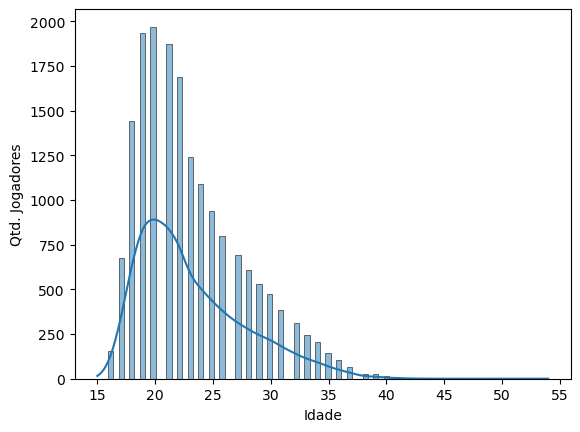

In [91]:
# 1. Qual é a distribuição de idade dos jogadores?
sns.histplot(df['Age'], kde=True)
plt.xlabel('Idade')
plt.ylabel('Qtd. Jogadores')
plt.show()

Club
Manchester United          66
Arsenal                    47
FC Barcelona               46
Newcastle United           45
Atlético de Madrid         45
Wolverhampton Wanderers    44
Chelsea                    42
Gangwon FC                 42
PSV                        41
Caracas Fútbol Club        41
Name: count, dtype: int64

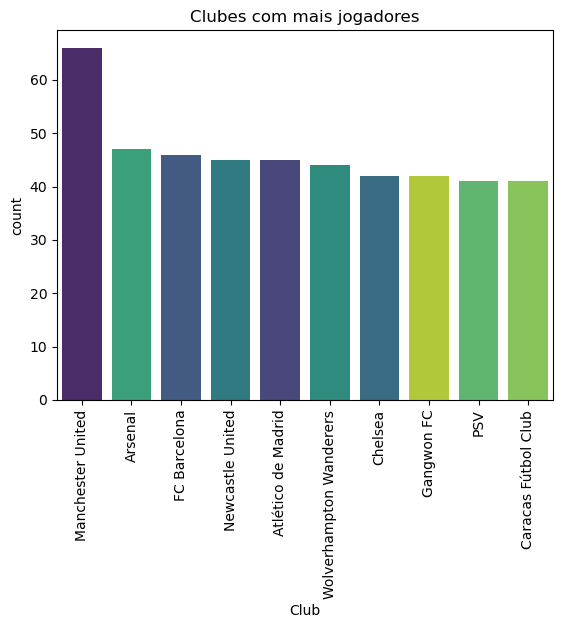

In [135]:
# Quais são os clubes com mais jogadores?
filtered_clubs = df[df['Club'] != 'Sem Clube']
top_10_clubs = filtered_clubs['Club'].value_counts().head(10).index
top10_clubs_df = filtered_clubs[filtered_clubs['Club'].isin(top_10_clubs)]

display(filtered_clubs['Club'].value_counts().head(10))

sns.countplot(data=top10_clubs_df, x='Club', hue='Club', palette='viridis', order=top_10_clubs)
plt.title('Clubes com mais jogadores')
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()


In [147]:
# Qual posição tem os jogadores com o melhor overall rating?

res_df = df[['Position', 'Overall', 'Name']]
res_df = res_df.drop_duplicates(subset='Position', keep='first')
res_df = res_df.sort_values(by='Overall', ascending=False, inplace=False) 

display(res_df.head(10))

,Position,Overall,Name
3,RCM,91,K. De Bruyne
41,ST,91,R. Lewandowski
25,RW,90,M. Salah
7843,GK,89,Ederson
5,RDM,89,J. Kimmich
102,LW,89,Neymar Jr
318,CB,88,Marquinhos
0,SUB,87,L. Goretzka
24,CDM,86,M. Brozović
6,LCB,86,D. Alaba



A correlação entre idade e overall é: 0.5956901314092928




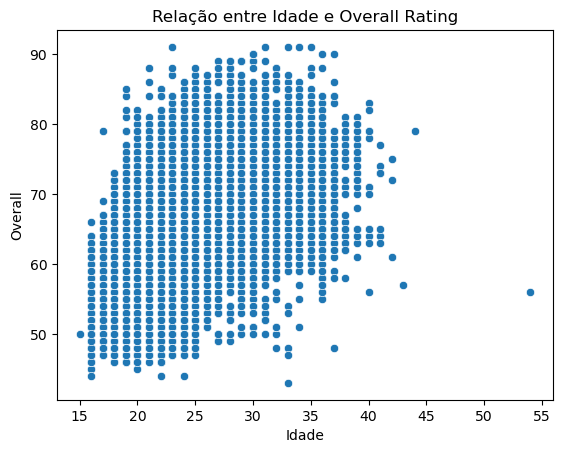

In [159]:
# Existe correlação entre idade e overall rating?

corr = df['Age'].corr(df['Overall'])
print(f"\nA correlação entre idade e overall é: {corr}\n\n")


sns.scatterplot(data=df, x='Age', y='Overall')
plt.title('Relação entre Idade e Overall Rating')
plt.xlabel('Idade')
plt.ylabel('Overall')
plt.show()

In [43]:
# Quais jogadores possuem cláusulas de rescisão mais altas?

res_df = df[df['Release Clause'] != 'Sem clausula']

res_df = res_df[['Name', 'Release Clause']].sort_values(by='Release Clause', ascending=False)
res_df['Rank'] = res_df['Release Clause'].rank(method='dense', ascending=False).astype('int')

display(res_df[['Rank', 'Name', 'Release Clause']].head(10))


,Rank,Name,Release Clause
75,1,K. Mbappé,366700000.0
180,2,E. Haaland,303400000.0
214,3,Pedri,261000000.0
17,4,F. de Jong,247600000.0
849,5,Vinícius Jr.,245300000.0
317,6,P. Foden,224500000.0
25,7,M. Salah,213700000.0
1767,8,Rúben Dias,206900000.0
52,9,H. Kane,200500000.0
13506,10,G. Donnarumma,199200000.0


In [47]:
def convertMoney(value):
    if isinstance(value, str):
        value = value.replace('€', '').strip()
        if 'M' in value:
            return float(value.replace('M', '').strip()) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '').strip()) * 1000
    return 'Sem clausula'

df['Wage'] = df['Wage'].apply(convertRelease)
df['Value'] = df['Value'].apply(convertRelease)

In [71]:
# Salvando o novo arquivo tratado .csv:

df.to_csv('../data/fifa_players_cleaned.csv', index=False)


In [49]:
df = df.rename(columns={
    'Release Clause': 'Release Clause - Euros',
    'Wage': 'Wage - Euros',
    'Value': 'Value - Euros'
})

display(df)

,ID,Name,Age,Nationality,Flag,Overall,Potential,Club,Value - Euros,Wage - Euros,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause - Euros,Kit Number
0,209658,L. Goretzka,27,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,91000000.0,115000.0,...,High/ Medium,Unique,Yes,SUB,"Jul 1, 2018",2026,189cm,82kg,157000000.0,8.0
1,212198,Bruno Fernandes,27,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,78500000.0,190000.0,...,High/ High,Unique,Yes,LCM,"Jan 30, 2020",2026,179cm,69kg,155000000.0,8.0
2,224334,M. Acuña,30,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,46500000.0,46000.0,...,High/ High,Stocky (170-185),No,LB,"Sep 14, 2020",2024,172cm,69kg,97700000.0,19.0
3,192985,K. De Bruyne,31,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,107500000.0,350000.0,...,High/ High,Unique,Yes,RCM,"Aug 30, 2015",2025,181cm,70kg,198900000.0,17.0
4,224232,N. Barella,25,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,89500000.0,110000.0,...,High/ High,Normal (170-),Yes,RCM,"Sep 1, 2020",2026,172cm,68kg,154400000.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,100000.0,Sem clausula,...,Medium/ Medium,Normal (185+),No,RES,"Apr 11, 2022",2027,190cm,78kg,218000.0,35.0
17656,267946,22 Lim Jun Sub,17,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,100000.0,Sem clausula,...,Medium/ Medium,Lean (185+),No,RES,"Jan 1, 2022",2026,195cm,84kg,188000.0,21.0
17657,270567,A. Demir,25,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,70000.0,2000.0,...,Medium/ Medium,Lean (185+),No,RES,"Jun 6, 2021",2023,190cm,82kg,142000.0,12.0
17658,256624,21 S. Czajor,18,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,90000.0,Sem clausula,...,Medium/ Medium,Normal (185+),No,RES,"Jan 1, 2020",2021,187cm,79kg,214000.0,40.0


In [51]:
df.drop(['Flag'], axis=1, inplace=True)

In [63]:
display(df)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value - Euros,Wage - Euros,Special,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause - Euros,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,2312,...,High/ Medium,Unique,Yes,SUB,"Jul 1, 2018",2026,189cm,82kg,157000000.0,8
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,2305,...,High/ High,Unique,Yes,LCM,"Jan 30, 2020",2026,179cm,69kg,155000000.0,8
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,2303,...,High/ High,Stocky (170-185),No,LB,"Sep 14, 2020",2024,172cm,69kg,97700000.0,19
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,2303,...,High/ High,Unique,Yes,RCM,"Aug 30, 2015",2025,181cm,70kg,198900000.0,17
4,224232,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,2296,...,High/ High,Normal (170-),Yes,RCM,"Sep 1, 2020",2026,172cm,68kg,154400000.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,China PR,48,61,Meizhou Hakka,100000.0,Sem clausula,762,...,Medium/ Medium,Normal (185+),No,RES,"Apr 11, 2022",2027,190cm,78kg,218000.0,35
17656,267946,22 Lim Jun Sub,17,Korea Republic,48,64,Jeju United FC,100000.0,Sem clausula,761,...,Medium/ Medium,Lean (185+),No,RES,"Jan 1, 2022",2026,195cm,84kg,188000.0,21
17657,270567,A. Demir,25,Turkey,51,56,Ümraniyespor,70000.0,2000.0,759,...,Medium/ Medium,Lean (185+),No,RES,"Jun 6, 2021",2023,190cm,82kg,142000.0,12
17658,256624,21 S. Czajor,18,Poland,50,65,Fleetwood Town,90000.0,Sem clausula,758,...,Medium/ Medium,Normal (185+),No,RES,"Jan 1, 2020",2021,187cm,79kg,214000.0,40


In [62]:
def convertKitNumber(value):
    try:
        return int(value)
    except ValueError:
        return 'Sem numero'
df['Kit Number'] = df['Kit Number'].apply(convertKitNumber)

In [70]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value - Euros,Wage - Euros,Special,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause - Euros,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,2312,...,High/ Medium,Unique,Yes,SUB,"Jul 1, 2018",2026,189cm,82kg,157000000.0,8
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,2305,...,High/ High,Unique,Yes,LCM,"Jan 30, 2020",2026,179cm,69kg,155000000.0,8
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,2303,...,High/ High,Stocky (170-185),No,LB,"Sep 14, 2020",2024,172cm,69kg,97700000.0,19
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,2303,...,High/ High,Unique,Yes,RCM,"Aug 30, 2015",2025,181cm,70kg,198900000.0,17
4,224232,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,2296,...,High/ High,Normal (170-),Yes,RCM,"Sep 1, 2020",2026,172cm,68kg,154400000.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,China PR,48,61,Meizhou Hakka,100000.0,Sem valor,762,...,Medium/ Medium,Normal (185+),No,RES,"Apr 11, 2022",2027,190cm,78kg,218000.0,35
17656,267946,22 Lim Jun Sub,17,Korea Republic,48,64,Jeju United FC,100000.0,Sem valor,761,...,Medium/ Medium,Lean (185+),No,RES,"Jan 1, 2022",2026,195cm,84kg,188000.0,21
17657,270567,A. Demir,25,Turkey,51,56,Ümraniyespor,70000.0,2000.0,759,...,Medium/ Medium,Lean (185+),No,RES,"Jun 6, 2021",2023,190cm,82kg,142000.0,12
17658,256624,21 S. Czajor,18,Poland,50,65,Fleetwood Town,90000.0,Sem valor,758,...,Medium/ Medium,Normal (185+),No,RES,"Jan 1, 2020",2021,187cm,79kg,214000.0,40


In [89]:
import re
import pandas as pd

# Importando .csv
df = pd.read_csv('../data/fifa_players.csv')

# Removendo todas as tags <span> da coluna 'Position':
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Removendo colunas desnecessárias
df.drop(['Loaned From', 'Best Overall Rating', 'Photo', 'Club Logo', 'Flag', 'Special'], axis=1, inplace=True)

# Tratando dados nulos
df['Club'].fillna('Sem Clube', inplace=True)
df['Body Type'].fillna('Nao especificado', inplace=True)
df['Real Face'].fillna('Nao possui', inplace=True)
df['Position'].fillna('Sem posicao', inplace=True)
df['Joined'].fillna('Nao especificado', inplace=True)
df['Kit Number'].fillna(0, inplace=True)

# Convertendo dinheiro, ex: €123K -> 123000.0
def convertMoney(value):
    if isinstance(value, str):
        value = value.replace('€', '').strip()
        if 'M' in value:
            return float(value.replace('M', '').strip()) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '').strip()) * 1000
    return 0 # Sem valor

df['Release Clause'] = df['Release Clause'].apply(convertMoney)
df['Wage'] = df['Wage'].apply(convertMoney)
df['Value'] = df['Value'].apply(convertMoney)

# Convertendo valores
df['Kit Number'] = df['Kit Number'].astype(int)
df['International Reputation'] = df['International Reputation'].astype(int)
df['Weak Foot'] = df['Weak Foot'].astype(int)
df['Skill Moves'] = df['Skill Moves'].astype(int)
df['Overall'] = df['Overall'].astype(int)
df['Potential'] = df['Potential'].astype(int)
df['Age'] = df['Age'].astype(int)
df['ID'] = df['ID'].astype(int)
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
df['Release Clause'] = df['Release Clause'].astype(int)
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], errors='coerce')
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Alterando o nome das colunas convertidas, para saber que é em Euros
df = df.rename(columns={
    'Release Clause': 'Release Clause - Euros',
    'Wage': 'Wage - Euros',
    'Value': 'Value - Euros'
})

# ================================================================== #

# Salvando o novo arquivo tratado .csv:
df.to_csv('../data/fifa_players_cleaned.csv', index=False)

C:\Users\guidf\AppData\Local\Temp\ipykernel_20892\4089479428.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club'].fillna('Sem Clube', inplace=True)
C:\Users\guidf\AppData\Local\Temp\ipykernel_20892\4089479428.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [90]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value - Euros,Wage - Euros,Preferred Foot,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause - Euros,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000,115000,Right,...,High/ Medium,Unique,Yes,SUB,2018-07-01,2026-01-01,189cm,82kg,157000000,8
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000,190000,Right,...,High/ High,Unique,Yes,LCM,2020-01-30,2026-01-01,179cm,69kg,155000000,8
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000,46000,Left,...,High/ High,Stocky (170-185),No,LB,2020-09-14,2024-01-01,172cm,69kg,97700000,19
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,Right,...,High/ High,Unique,Yes,RCM,2015-08-30,2025-01-01,181cm,70kg,198900000,17
4,224232,N. Barella,25,Italy,86,89,Inter,89500000,110000,Right,...,High/ High,Normal (170-),Yes,RCM,2020-09-01,2026-01-01,172cm,68kg,154400000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,China PR,48,61,Meizhou Hakka,100000,0,Right,...,Medium/ Medium,Normal (185+),No,RES,2022-04-11,2027-01-01,190cm,78kg,218000,35
17656,267946,22 Lim Jun Sub,17,Korea Republic,48,64,Jeju United FC,100000,0,Right,...,Medium/ Medium,Lean (185+),No,RES,2022-01-01,2026-01-01,195cm,84kg,188000,21
17657,270567,A. Demir,25,Turkey,51,56,Ümraniyespor,70000,2000,Right,...,Medium/ Medium,Lean (185+),No,RES,2021-06-06,2023-01-01,190cm,82kg,142000,12
17658,256624,21 S. Czajor,18,Poland,50,65,Fleetwood Town,90000,0,Right,...,Medium/ Medium,Normal (185+),No,RES,2020-01-01,2021-01-01,187cm,79kg,214000,40


In [78]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value - Euros,Wage - Euros,Special,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause - Euros,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,2312,...,High/ Medium,Unique,Yes,SUB,"Jul 1, 2018",2026,189cm,82kg,157000000.0,8
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,2305,...,High/ High,Unique,Yes,LCM,"Jan 30, 2020",2026,179cm,69kg,155000000.0,8
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,2303,...,High/ High,Stocky (170-185),No,LB,"Sep 14, 2020",2024,172cm,69kg,97700000.0,19
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,2303,...,High/ High,Unique,Yes,RCM,"Aug 30, 2015",2025,181cm,70kg,198900000.0,17
4,224232,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,2296,...,High/ High,Normal (170-),Yes,RCM,"Sep 1, 2020",2026,172cm,68kg,154400000.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,China PR,48,61,Meizhou Hakka,100000.0,Sem clausula,762,...,Medium/ Medium,Normal (185+),No,RES,"Apr 11, 2022",2027,190cm,78kg,218000.0,35
17656,267946,22 Lim Jun Sub,17,Korea Republic,48,64,Jeju United FC,100000.0,Sem clausula,761,...,Medium/ Medium,Lean (185+),No,RES,"Jan 1, 2022",2026,195cm,84kg,188000.0,21
17657,270567,A. Demir,25,Turkey,51,56,Ümraniyespor,70000.0,2000.0,759,...,Medium/ Medium,Lean (185+),No,RES,"Jun 6, 2021",2023,190cm,82kg,142000.0,12
17658,256624,21 S. Czajor,18,Poland,50,65,Fleetwood Town,90000.0,Sem clausula,758,...,Medium/ Medium,Normal (185+),No,RES,"Jan 1, 2020",2021,187cm,79kg,214000.0,40


In [92]:
df[['Name', 'Value - Euros']].sort_values(by='Value - Euros', ascending=False)

,Name,Value - Euros
75,K. Mbappé,190500000
180,E. Haaland,148000000
17,F. de Jong,116500000
214,Pedri,116000000
25,M. Salah,115500000
...,...,...
11814,20 V. Popov,0
16177,21 S. Gbohouo,0
15719,20 C. Kameni,0
507,22 D. Kuzyaev,0
